<a href="https://colab.research.google.com/github/Edrasen/Advanced_Neuronal_Networks/blob/main/Tarea_de_la_red_Vanilla_TF1_(EARM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 1_ Red neuronal Perceptrón multicapa  

En esta primera tarea es necesario que realicen  un clasificador de prendas de ropa  para esto será necesario usar el  conjunto de entrenamiento Fashion Mnist

Este conjunto está conformado por fotografías de 10 diferentes estilos de ropa en imagenes de 28X28 

El clasificador debe de ser capaz de separar adecuadamente las diferentes imágenes.  Con este tipo de red se tiene una expectativa de un 97%  de exactitud.

    - Realizar la red neuronal programada completamente con TensorFlow
    - Realizar la misma arquitectura con Keras  

Adjunto encontrarán el código que ya tiene incorporada la lectura del conjunto de datos


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


## Lectura del conjunto de datos 

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

## Separando el conjunto de datos en Entrenamiento y prueba 

In [4]:
(x_train, y_train), (x_test, y_test)=fashion_mnist

Analizando el conjunto de Fashion_mnist

In [5]:
x_train.resize(60000,784)

In [6]:
x_test.resize(10000,784)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#x_train = x_train * (1/255.0)
x_train = x_train/255
x_test = x_test/255
#x_test = x_test * (1/255.0)

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [11]:
imagendemo=np.reshape(x_train[5,:],(28,28))

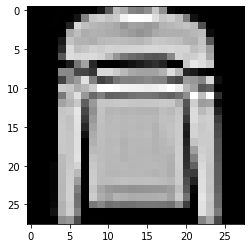

In [12]:
plt.imshow(imagendemo,cmap='gray')

Las etiquetas numéricas pueden ser transformadas al nombre de la clase correspondiente usando el siguiente diccionario 

In [13]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [14]:
label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [15]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [16]:
#image_matrix(imagendemo)

# Declarando la arquitectura


In [17]:
def Neuronal_net_model(n_nodes_hl1=600, n_nodes_hl2=600, n_nodes_hl3=600, n_classes=10):
  #inputs and outputs
  x = tf.placeholder('float', [None, 784])
  y = tf.placeholder('float')

  #variables
  hidden_layer_1 = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

  hidden_layer_2 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1,n_nodes_hl2])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

  hidden_layer_3 = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2,n_nodes_hl3])),
                    'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

  output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                  'biases':tf.Variable(tf.random_normal([n_classes]))}

  #architecture

  l1 = tf.add(tf.matmul(x,hidden_layer_1['weights']), hidden_layer_1['biases'])
  l1 = tf.nn.relu(l1)

  l2 = tf.add(tf.matmul(l1,hidden_layer_2['weights']), hidden_layer_2['biases'])
  l2 = tf.nn.relu(l2)

  l3 = tf.add(tf.matmul(l2,hidden_layer_3['weights']), hidden_layer_3['biases'])
  l3 = tf.nn.relu(l3)

  output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

  cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=output
                                                                 , labels=y))
  
  optimizer = tf.train.AdamOptimizer().minimize(cost)

  return dict(
            x=x,
            y=y,
            output=output,
            cost=cost,
            optimizer=optimizer
            )

In [18]:
#Modelo testing
DNN = Neuronal_net_model()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Training and testing function

In [22]:
def next_bach(start, end):
  return x_train[start:end], y_train[start:end]

In [23]:
def train_neuronal_net(DNN, hm_epochs=15, batch_size=100):
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(hm_epochs):
      start = 0
      end = start + batch_size
      epoch_loss = 0
      for _ in range(int(len(x_train)/batch_size)):
        epoch_x, epoch_y = next_bach(start,end)
        feed_dict={DNN["x"]: epoch_x,
                   DNN["y"]: epoch_y}
        _, c, prediction,y = sess.run([DNN["optimizer"], DNN["cost"]
                                       , DNN["output"], DNN["y"]],
                                       feed_dict=feed_dict)
        epoch_loss += c
        start += batch_size
        end = start + batch_size

      
      print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
      #print(len(epoch_x))
    prediction,y = sess.run([DNN["output"], DNN["y"]], feed_dict={DNN["x"]:x_test, DNN["y"]:y_test})
    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval())

In [24]:
train_neuronal_net(DNN)

Epoch 0 completed out of 15 loss: 2688018.2045898438
Epoch 1 completed out of 15 loss: 1045097.4406738281
Epoch 2 completed out of 15 loss: 720653.2073669434
Epoch 3 completed out of 15 loss: 549520.2068481445
Epoch 4 completed out of 15 loss: 427135.04264831543
Epoch 5 completed out of 15 loss: 334269.49922943115
Epoch 6 completed out of 15 loss: 279153.2643661499
Epoch 7 completed out of 15 loss: 245336.65618133545
Epoch 8 completed out of 15 loss: 208326.01785850525
Epoch 9 completed out of 15 loss: 186936.21293258667
Epoch 10 completed out of 15 loss: 166583.28491592407
Epoch 11 completed out of 15 loss: 138996.7108669281
Epoch 12 completed out of 15 loss: 133375.59699058533
Epoch 13 completed out of 15 loss: 114548.18531322479
Epoch 14 completed out of 15 loss: 105917.34671163559
Accuracy: 0.844
